In [1]:
# from spatialize.gs.esi import hparams_search, egriddata

import hvplot.xarray  # noqa: adds hvplot methods to xarray objects
import hvplot
hvplot.extension()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
import numpy as np
def func(x, y):  # a kind of cubic function
    return x * (1 - x) * np.cos(4 * np.pi * x) * np.sin(4 * np.pi * y ** 2) ** 2

grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]

rng = np.random.default_rng()
points = rng.random((1000, 2))
values = func(points[:,0], points[:,1])

In [3]:
from scipy.interpolate import griddata
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')

In [4]:
import xarray as xr

ds = xr.DataArray(func(grid_x, grid_y).T)
ds0 = xr.DataArray(grid_z0.T)
ds1 = xr.DataArray(grid_z1.T)
ds2 = xr.DataArray(grid_z2.T)


:Layout
   .Image.I   :Image   [dim_1,dim_0]   (value)
   .Image.II  :Image   [dim_1,dim_0]   (value)
   .Image.III :Image   [dim_1,dim_0]   (value)
   .Image.IV  :Image   [dim_1,dim_0]   (value)
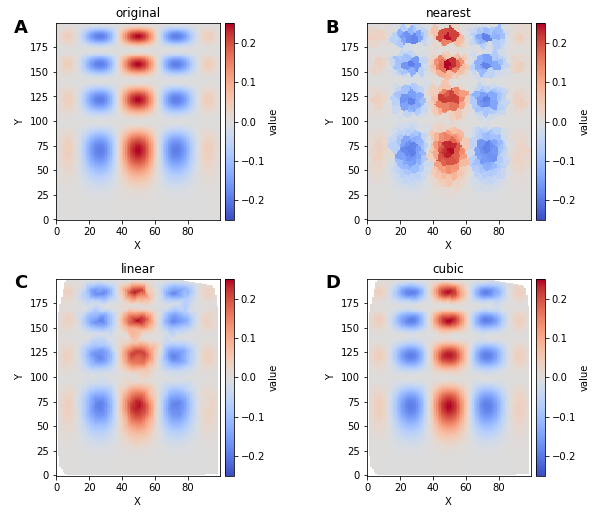

In [5]:
w, h = 500, 600
fig = ds.hvplot.image(title="original", width=w, height=h, xlabel='X', ylabel='Y') + \
      ds0.hvplot.image(title="nearest", width=w, height=h, xlabel='X', ylabel='Y') + \
      ds1.hvplot.image(title="linear", width=w, height=h, xlabel='X', ylabel='Y') + \
      ds2.hvplot.image(title="cubic", width=w, height=h, xlabel='X', ylabel='Y')
fig.cols(2)

In [ ]:
import spatialize.gs.esi.aggfunc as af
from spatialize.gs.esi import egriddata

xi = np.column_stack((grid_x.flatten(), grid_y.flatten()))

grid_z3 = egriddata(points, values, xi, n_partitions=100, alpha=0.99, exponent=7.0,
                    agg_func=af.mean)
grid_z3 = grid_z3.reshape([grid_x.shape[0], grid_x.shape[1]])
ds3 = xr.DataArray(grid_z3.T)

fig = fig + ds3.hvplot.image(title="esi idw", width=w, height=h, xlabel='X', ylabel='Y')
fig.cols(3)

:Layout
   .Image.I   :Image   [dim_1,dim_0]   (value)
   .Image.II  :Image   [dim_1,dim_0]   (value)
   .Image.III :Image   [dim_1,dim_0]   (value)
   .Image.IV  :Image   [dim_1,dim_0]   (value)
   .Image.V   :Image   [dim_1,dim_0]   (value)
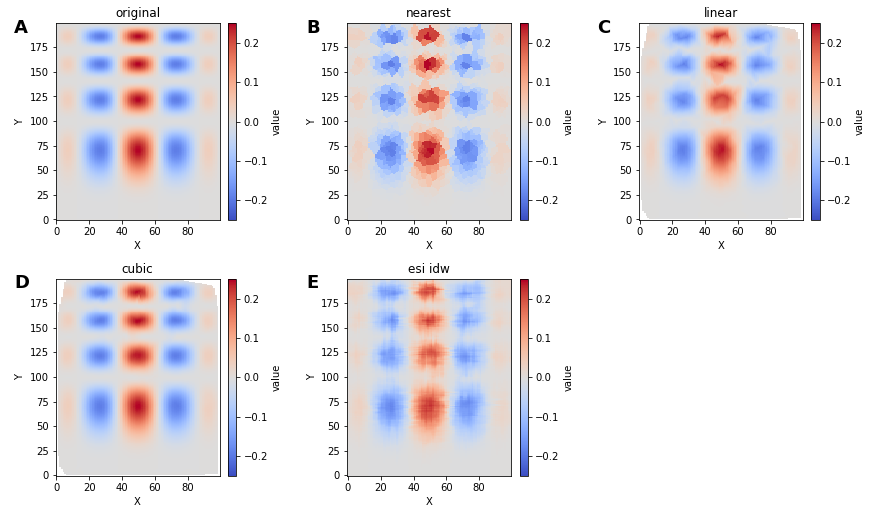